<h1>Содержание<span class="tocSkip"></span></h1>


# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цель проекта**: проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Для достижения поставленной цели необходимо выполнить следующие задачи:

**Задачи проекта**:

1. описание поведения клиентов оператора, исходя из выборки
2. проверка гипотезы о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
3. проверка гипотезы о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

## Изучение данных из файлов

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
import calendar

### Файл с информацией о звонках

In [2]:
#Читаем первый файл
data_calls = pd.read_csv('/datasets/calls.csv') 
#Просмотр первые строки файла
display(data_calls.head())
#Просмотр общей информации о файле
data_calls.info() 

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
for column in data_calls:
        print(data_calls[column].value_counts().sort_index(ascending=True))

1000_0      1
1000_1      1
1000_10     1
1000_100    1
1000_101    1
           ..
1499_95     1
1499_96     1
1499_97     1
1499_98     1
1499_99     1
Name: id, Length: 202607, dtype: int64
2018-01-01       5
2018-01-02       9
2018-01-03       7
2018-01-04      23
2018-01-05      20
              ... 
2018-12-27    1110
2018-12-28    1106
2018-12-29    1202
2018-12-30    1192
2018-12-31    1435
Name: call_date, Length: 365, dtype: int64
0.00     39613
0.01       101
0.02        84
0.03        80
0.04        85
         ...  
35.95        1
36.12        1
36.47        1
37.35        1
38.00        1
Name: duration, Length: 2871, dtype: int64
1000    368
1001    122
1002    217
1003    520
1004    176
       ... 
1495    565
1496    828
1497    201
1498    180
1499    220
Name: user_id, Length: 492, dtype: int64


In [4]:
#Проверим таблицу на явные дубликаты
data_calls.duplicated().sum()

0

### Файл с информацией об интернет-сессиях

In [5]:
#Читаем второй файл
data_internet = pd.read_csv('/datasets/internet.csv') 
#Просмотр первые строки файла
display(data_internet.head())
#Просмотр общей информации о файле
data_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
for column in data_internet:
        print(data_internet[column].value_counts().sort_index(ascending=True))

0         1
1         1
2         1
3         1
4         1
         ..
149391    1
149392    1
149393    1
149394    1
149395    1
Name: Unnamed: 0, Length: 149396, dtype: int64
1000_0      1
1000_1      1
1000_10     1
1000_100    1
1000_101    1
           ..
1499_95     1
1499_96     1
1499_97     1
1499_98     1
1499_99     1
Name: id, Length: 149396, dtype: int64
0.00       19598
0.03           1
0.04           1
0.06           1
0.07           2
           ...  
1623.92        1
1651.25        1
1651.55        1
1702.75        1
1724.83        1
Name: mb_used, Length: 70003, dtype: int64
2018-01-01       3
2018-01-02       3
2018-01-03       6
2018-01-04       9
2018-01-05      14
              ... 
2018-12-27     803
2018-12-28     802
2018-12-29     825
2018-12-30     903
2018-12-31    1057
Name: session_date, Length: 365, dtype: int64
1000    211
1001     96
1002    369
1003    104
1004    300
       ... 
1495    254
1496    834
1497    121
1498    232
1499    157
Name: user_

In [7]:
#Проверим таблицу на явные дубликаты
data_internet.duplicated().sum()

0

### Файл с информацией о сообщениях

In [8]:
#Читаем третий файл
data_messages = pd.read_csv('/datasets/messages.csv') 
#Просмотр первые строки файла
display(data_messages.head())
#Просмотр общей информации о файле
data_messages.info() 

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
for column in data_messages:
        print(data_messages[column].value_counts().sort_index(ascending=True))

1000_0      1
1000_1      1
1000_10     1
1000_100    1
1000_101    1
           ..
1499_95     1
1499_96     1
1499_97     1
1499_98     1
1499_99     1
Name: id, Length: 123036, dtype: int64
2018-01-02     10
2018-01-03      4
2018-01-04     10
2018-01-05     10
2018-01-06     15
             ... 
2018-12-27    644
2018-12-28    699
2018-12-29    702
2018-12-30    765
2018-12-31    859
Name: message_date, Length: 364, dtype: int64
1000     496
1002      70
1003     380
1004    1192
1005     552
        ... 
1495     340
1496     468
1497      51
1498     168
1499     184
Name: user_id, Length: 426, dtype: int64


In [10]:
#Проверим таблицу на явные дубликаты
data_messages.duplicated().sum()

0

### Файл с информацией о тарифах

In [11]:
#Читаем четвертый файл
data_tariffs = pd.read_csv('/datasets/tariffs.csv') 
#Просмотр первые строки файла
display(data_tariffs.head())
#Просмотр общей информации о файле
data_tariffs.info() 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [12]:
for column in data_tariffs:
        print(data_tariffs[column].value_counts().sort_index(ascending=True))

50      1
1000    1
Name: messages_included, dtype: int64
15360    1
30720    1
Name: mb_per_month_included, dtype: int64
500     1
3000    1
Name: minutes_included, dtype: int64
550     1
1950    1
Name: rub_monthly_fee, dtype: int64
150    1
200    1
Name: rub_per_gb, dtype: int64
1    1
3    1
Name: rub_per_message, dtype: int64
1    1
3    1
Name: rub_per_minute, dtype: int64
smart    1
ultra    1
Name: tariff_name, dtype: int64


In [13]:
#Проверим таблицу на явные дубликаты
data_tariffs.duplicated().sum()

0

### Файл с информацей о пользователях

In [14]:
#Читаем пятый файл
data_users = pd.read_csv('/datasets/users.csv') 
#Просмотр первые строки файла
display(data_users.head())
#Просмотр общей информации о файле
data_users.info() 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [15]:
for column in data_users:
        print(data_users[column].value_counts().sort_index(ascending=True))

1000    1
1001    1
1002    1
1003    1
1004    1
       ..
1495    1
1496    1
1497    1
1498    1
1499    1
Name: user_id, Length: 500, dtype: int64
18     6
19     9
20     9
21    12
22     5
23     9
24     9
25     7
26    11
27     9
28     9
29    11
30     9
31     7
32     7
33     5
34     5
35     7
36    10
37    11
38     5
39    11
40    12
41    10
42    14
43     7
44     8
45    10
46     7
47    11
48     9
49     4
50     9
51     9
52    10
53    14
54     6
55     8
56     9
57     4
58    10
59     6
60     8
61     3
62     8
63    13
64    13
65     9
66     9
67     7
68     9
69     8
70    10
71    13
72     5
73    12
74     7
75     6
Name: age, dtype: int64
2018-08-17    1
2018-08-31    1
2018-09-02    1
2018-09-26    1
2018-09-27    1
2018-10-03    2
2018-10-04    1
2018-10-05    1
2018-10-14    2
2018-10-25    1
2018-10-27    1
2018-10-28    1
2018-11-07    1
2018-11-13    1
2018-11-16    1
2018-11-21    1
2018-11-22    1
2018-11-26    1
2018-11-27    1

In [16]:
#Проверим таблицу на явные дубликаты
data_users.duplicated().sum()

0

### Выводы по главе 1

Изучая таблицы можно заметить, что:
1. таблица с информацией о звонках содержит 202607 записей в четырех колонках:
- `id` (уникальный номер звонка),
- `call_date` (дата звонка),
- `duration` (длительность звонка в минутах),
- `user_id` (идентификатор пользователя, сделавшего звонок)
<br> Пропусков нет, тип данных столбца с датой необходимо привести к формату даты, идентификатор пользователя приведем к типу str, это поможет нам в дальнейшей работе
2. таблица с информацией об интернет-сессиях содержит 149396 записей в пяти колонках:
- `Unnamed` (столбец с индексом),
- `id` (уникальный номер сессии),
- `mb_used` (объём потраченного за сессию интернет-трафика (в мегабайтах)),
- `session_date` (дата интернет-сессии),
- `user_id` (идентификатор пользователя)
<br> Пропусков нет, тип данных столбца с датой необходимо привести к формату даты, идентификатор пользователя приведем к типу str, это поможет нам в дальнейшей работе
<br> Столбец Unnamed дублирует столбец id, поэтому в главе 2 Предобработка данных мы его удалим
3. таблица с информацией об о сообщениях содержит 123036  записей в трех колонках:
- `id` (уникальный номер сообщения),
- `message_date` (дата сообщения),
- `user_id` (идентификатор пользователя, отправившего сообщение)
<br> Пропусков нет, тип данных столбца с датой необходимо привести к формату даты, идентификатор пользователя приведем к типу str, это поможет нам в дальнейшей работе
4. таблица с информацией о тарифах содержит 2 записи в 8 колонках:
- `messages_included` (количество сообщений в месяц, включённых в абонентскую плату),
- `mb_per_month_included` (объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)),
- `minutes_included` (количество минут разговора в месяц, включённых в абонентскую плату),
- `rub_monthly_fee` (ежемесячная абонентская плата в рублях),
- `rub_per_gb` (стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета),
- `rub_per_message` (тоимость отправки сообщения сверх тарифного пакета),
- `rub_per_minute` (стоимость минуты разговора сверх тарифного пакета),
- `tariff_name` (название тарифа)
<br> Пропусков нет, типы данных соответствуют логике. Необходимо перевести объем интернет-трафика в Гб, а затем переименовать столбец
5. таблица с информацией о пользователях содержит 500 записей в 8 колонках:
- `user_id` (уникальный идентификатор пользователя),
- `age` (возраст пользователя (годы)),
- `churn_date` (дата прекращения пользования тарифом),
- `city` (город пользователя),
- `first_name` (имя пользователя),
- `last_name` (фамилия пользователя),
- `reg_date` (дата подключения тарифа), 
- `tariff` (название тарифного плана).
<br> Пропуски есть в столбце churn_date, но это логично, так как если значение пропущено, то тариф ещё действовал на момент выгрузки данных, тип данных столбца с датой необходимо привести к формату даты, идентификатор пользователя приведем к типу str, это поможет нам в дальнейшей работе. 
6. Наименование столбца tariff в таблице 4 имеет другое название (tariff_name), приведем их к единому виду. Для этого в главе 2 переименуем столбец tariff_name таблицы data_tariffs. Ннаименования всех остальных столбцов соответствуют правилам и не противоречат друг другу.
7. При просмотре уникальных значений столбцов возможные выбросы не бросаются в глаза, длительности звонков, интернет-сессий, сообщений, возраста пользователей лежат в пределах разумных значений.
8. Про проверке уникальных значений дат мы видим, что все даты лежат в пределах одного года (2018), поэтому в дальнейшем мы можем сгруппировать данные по месяцам, не принимая во внимание год и числа (поскольку для достижения поставленных задач требуется информация помесячно)
9. Данных для проверки достаточно, необходимо провести требуемые расчеты, а затем провести исследовательский анализ данных

## Предобработка данных

### Преобразования, переименование и удаление столбцов

In [17]:
#Пробразуем вышеперечисленные столбцы в необходимые форматы
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'])
data_users['churn_date']  = pd.to_datetime(data_users['churn_date'])
data_calls['user_id'] = data_calls['user_id'].astype('str')
data_internet['user_id'] = data_internet ['user_id'].astype('str')
data_messages['user_id'] = data_messages['user_id'].astype('str')
data_users['user_id'] = data_users['user_id'].astype('str')

#Переименуем столбец tariff_name таблицы data_tariffs
data_tariffs = data_tariffs.rename(columns={'tariff_name' : 'tariff'}) 

#Удалим дублирующий столбец Unnamed в таблице data_internet
data_internet = data_internet.drop('Unnamed: 0', axis=1)
#print(data_internet.head())

#Перевод мб в гб, переименование столбца
data_tariffs['mb_per_month_included'] = data_tariffs['mb_per_month_included'] / 1024
data_tariffs = data_tariffs.rename(columns={'mb_per_month_included' : 'gb_per_month_included'})
data_tariffs['gb_per_month_included'] = data_tariffs['gb_per_month_included'].astype('int64')

#data_tariffs.info()

### Округление длительности звонков в таблице data_calls

Согласно входящей информации, предоставленной компанией: каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Округлим все звонки до минут. Поскольку теперь длительности звонков стали целыми числами, тип float больше не актуален, поменяем тип на int64

In [18]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil).astype('Int64')
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Согласно входящей информации, предоставленной компанией: для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Поэтому округлять веб-трафик мы не будем, оставим его как есть, и, соответственно, не будем менять тип данных (оставим float).

### Выводы по главе 2

Во время предобработки данных, мы привели все столбцы к требуемым типам, заменили несовпадающие названия столбцов с одинаковой информацией, удалили дублирующий столбец, округлили длительности звонков, перевели мб в гб в таблице с тарифами

## Расчеты и добавление результатов

### Группировка данных по звонкам

Произведем расчет количества сделанных звонков и израсходованных минут разговора по месяцам
<br>Для этого, помня что в датафрейме приведена информация только за один год, отбросим год и сгрупируем звонки по месяцам

In [19]:
#Определим месяц в котором был совершен звонок
data_calls['call_date'] = data_calls['call_date'].dt.month
        
# переименуем столбец
data_calls = data_calls.rename(columns={'call_date':'month'})
data_calls.head()

,id,month,duration,user_id
0,1000_0,7,0,1000
1,1000_1,8,0,1000
2,1000_2,6,3,1000
3,1000_3,9,14,1000
4,1000_4,12,6,1000


In [20]:
data_calls_month = data_calls.pivot_table(      
    index=['user_id', 'month'],
    values='duration',     
    aggfunc=['count', 'sum']               
)
#переименуем столбцы
data_calls_month.columns = ['duration_count_month', 'duration_sum_month']
#сделаем переиндексацию
data_calls_month.reset_index(inplace=True)
data_calls_month.head()

,user_id,month,duration_count_month,duration_sum_month
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


### Группировка данных по сообщениям

In [21]:
#Аналогично звонкам обработаем данные по сообщениям
data_messages['message_date'] = data_messages['message_date'].dt.month
#переименуем столбец        
data_messages = data_messages.rename(columns={'message_date':'month'})
#создадим сводную таблицу
data_messages_month = data_messages.pivot_table(      
    index=['user_id', 'month'],
    values='user_id',     
    aggfunc=['count']               
)
#переименуем столбец 
data_messages_month.columns = ['messages_count_month']
#сделаем переиндексацию
data_messages_month.reset_index(inplace=True)
data_messages_month.head()

,user_id,month,messages_count_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Группировка данных по объему израсходованного интернет-трафика

In [22]:
#Аналогично звонкам обработаем данные по интернет-трафику
data_internet['session_date'] = data_internet['session_date'].dt.month
#переименуем столбец
data_internet = data_internet.rename(columns={'session_date':'month'})
#создадим сводную таблицу
data_internet_month = data_internet.pivot_table(      
    index=['user_id', 'month'],
    values='mb_used',     
    aggfunc=['sum']               
)
#переименуем столбец 
data_internet_month.columns = ['internet_sum_month']
#сделаем переиндексацию
data_internet_month.reset_index(inplace=True)
data_internet_month.head(10)

,user_id,month,internet_sum_month
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


Вернемся к входящим данным от компании: для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. 
<br> Следовательно, переведем объем веб-трафика за месяц в Гб и округлим до большего целого.

In [23]:
data_internet_month['internet_sum_month'] = data_internet_month['internet_sum_month']/1024
data_internet_month['internet_sum_month'] = data_internet_month['internet_sum_month'].apply(np.ceil).astype('Int64')

data_internet_month.head(10)

,user_id,month,internet_sum_month
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
5,1000,10,15
6,1000,11,15
7,1000,12,10
8,1001,11,18
9,1001,12,14


### Создание единой таблицы с данными о звонках, сообщениях и трафике

Для начала объединим сгруппированные таблицы звонков и сообщений

In [24]:
data_calls_messanges_month = data_calls_month.merge(
    data_messages_month, 
    on=['user_id', 'month'], how='outer'
)
data_calls_messanges_month['duration_count_month'] = data_calls_messanges_month['duration_count_month'].astype('Int64')
data_calls_messanges_month['messages_count_month'] = data_calls_messanges_month['messages_count_month'].astype('Int64')

data_calls_messanges_month.reset_index(inplace=True)
data_calls_messanges_month = data_calls_messanges_month.drop(columns=['index'], axis=1)
data_calls_messanges_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 5 columns):
user_id                 3213 non-null object
month                   3213 non-null int64
duration_count_month    3174 non-null Int64
duration_sum_month      3174 non-null Int64
messages_count_month    2717 non-null Int64
dtypes: Int64(3), int64(1), object(1)
memory usage: 135.0+ KB


Теперь присоединим к вышеполученной таблице таблицу с сообщениями

In [25]:
data_id = data_calls_messanges_month.merge(
    data_internet_month, 
    on=['user_id', 'month'], how='outer'
)
data_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id                 3214 non-null object
month                   3214 non-null int64
duration_count_month    3174 non-null Int64
duration_sum_month      3174 non-null Int64
messages_count_month    2717 non-null Int64
internet_sum_month      3203 non-null Int64
dtypes: Int64(4), int64(1), object(1)
memory usage: 188.3+ KB


### Объединим данные о пользователях с данными о тарифах

In [26]:
data_users_tariffs = data_users.merge(data_tariffs, on='tariff', how='outer')
data_users_tariffs.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30,3000,1950,150,1,1
2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30,3000,1950,150,1,1
3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30,3000,1950,150,1,1
4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30,3000,1950,150,1,1


В столбце churn_date часто встречаются значения NaN, это означает, что тариф ещё действовал на момент выгрузки данных. Нам необходимо заменить пустые значения на какую-то информацию, заменим на 31/12/2018, что не будет противоречить истине, принимая во внимание то, что исследуется 2018 год по декабрь включительно
Также поскольку оплата производится за месяц, то в столбцах churn_date и reg_date можно оставить только месяц, так как мы делали ранее в таблицах со звонками, сообщениями и трафиком

In [27]:
data_users_tariffs['churn_date'].fillna('2018-12-31', inplace=True)
data_users_tariffs['churn_date']  = pd.to_datetime(data_users_tariffs['churn_date'])
data_users_tariffs.reset_index(inplace=True)
data_users_tariffs = data_users_tariffs.drop(columns=['index'], axis=1)

#Определим месяц, в котором был аннуливан тариф
data_users_tariffs['churn_date'] = data_users_tariffs['churn_date'].dt.month

#Определим месяц, в котором был зарегистрирован тариф
data_users_tariffs['reg_date'] = data_users_tariffs['reg_date'].dt.month

data_users_tariffs.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,12,Краснодар,Рафаил,Верещагин,5,ultra,1000,30,3000,1950,150,1,1
1,1003,23,12,Москва,Белла,Белякова,8,ultra,1000,30,3000,1950,150,1,1
2,1004,68,12,Новокузнецк,Татьяна,Авдеенко,5,ultra,1000,30,3000,1950,150,1,1
3,1013,36,12,Иваново,Борис,Андреенко,11,ultra,1000,30,3000,1950,150,1,1
4,1016,58,12,Омск,Марица,Сазонова,11,ultra,1000,30,3000,1950,150,1,1


### Сбор всей информации в единую таблицу

In [28]:
common_data = data_users_tariffs.merge(data_id, on='user_id', how='outer')
print(common_data.info())
common_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null object
age                      3216 non-null int64
churn_date               3216 non-null int64
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null int64
tariff                   3216 non-null object
messages_included        3216 non-null int64
gb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
month                    3214 non-null float64
duration_count_month     3174 non-null Int64
duration_sum_month       3174 non-null Int64
messages_count_month     2717 non-null Int64
internet_sum_month       3203 n

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,duration_count_month,duration_sum_month,messages_count_month,internet_sum_month
0,1000,52,12,Краснодар,Рафаил,Верещагин,5,ultra,1000,30,3000,1950,150,1,1,5.0,22,159,22,3
1,1000,52,12,Краснодар,Рафаил,Верещагин,5,ultra,1000,30,3000,1950,150,1,1,6.0,43,172,60,23
2,1000,52,12,Краснодар,Рафаил,Верещагин,5,ultra,1000,30,3000,1950,150,1,1,7.0,47,340,75,14
3,1000,52,12,Краснодар,Рафаил,Верещагин,5,ultra,1000,30,3000,1950,150,1,1,8.0,52,408,81,14
4,1000,52,12,Краснодар,Рафаил,Верещагин,5,ultra,1000,30,3000,1950,150,1,1,9.0,58,466,57,15


В некоторых столбцах есть пропуски, но это не искажает общую картину исследования, поскольку просто некоторые абоненты в некоторые периоды времени не пользовались какими-либо услугами

### Расчет помесячной выручки с каждого пользователя
Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану

In [29]:
common_data['pay_calls'] = (
    np.where(common_data['duration_sum_month'] > common_data['minutes_included'],
             common_data['duration_sum_month'] - common_data['minutes_included'], 
             0)
)

common_data['pay_messages'] = (
    np.where(common_data['messages_count_month'] > common_data['messages_included'], 
             common_data['messages_count_month'] - common_data['messages_included'], 
             0)
)

common_data['pay_internet'] = (
    np.where(common_data['internet_sum_month'] > common_data['gb_per_month_included'], 
             common_data['internet_sum_month'] - common_data['gb_per_month_included'],
             0)
)

common_data['pay_abonent'] = (
    np.where((common_data['month'] >= common_data['reg_date']) &
             (common_data['month'] <= common_data['churn_date']),
             1,
             0
            )
)

common_data['total_pay'] = (
    common_data['pay_abonent'] * common_data['rub_monthly_fee'] +
    common_data['pay_internet'] * common_data['rub_per_gb'] +
    common_data['pay_messages'] * common_data['rub_per_message'] +
    common_data['pay_calls'] * common_data['rub_per_minute']
)
common_data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,...,month,duration_count_month,duration_sum_month,messages_count_month,internet_sum_month,pay_calls,pay_messages,pay_internet,pay_abonent,total_pay
0,1000,52,12,Краснодар,Рафаил,Верещагин,5,ultra,1000,30,...,5.0,22,159,22,3,0,0,0,1,1950
1,1000,52,12,Краснодар,Рафаил,Верещагин,5,ultra,1000,30,...,6.0,43,172,60,23,0,0,0,1,1950
2,1000,52,12,Краснодар,Рафаил,Верещагин,5,ultra,1000,30,...,7.0,47,340,75,14,0,0,0,1,1950
3,1000,52,12,Краснодар,Рафаил,Верещагин,5,ultra,1000,30,...,8.0,52,408,81,14,0,0,0,1,1950
4,1000,52,12,Краснодар,Рафаил,Верещагин,5,ultra,1000,30,...,9.0,58,466,57,15,0,0,0,1,1950


In [30]:
common_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 25 columns):
user_id                  3216 non-null object
age                      3216 non-null int64
churn_date               3216 non-null int64
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null int64
tariff                   3216 non-null object
messages_included        3216 non-null int64
gb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
month                    3214 non-null float64
duration_count_month     3174 non-null Int64
duration_sum_month       3174 non-null Int64
messages_count_month     2717 non-null Int64
internet_sum_month       3203 n

In [31]:
common_data['total_pay'] = common_data['total_pay'].astype('float64')
common_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 25 columns):
user_id                  3216 non-null object
age                      3216 non-null int64
churn_date               3216 non-null int64
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null int64
tariff                   3216 non-null object
messages_included        3216 non-null int64
gb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
month                    3214 non-null float64
duration_count_month     3174 non-null Int64
duration_sum_month       3174 non-null Int64
messages_count_month     2717 non-null Int64
internet_sum_month       3203 n

### Выводы по главе 3
В ходе выполнения данного пункта мы рассчитали по каждому абоненту количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений и объем израсходованного интернет-трафика за каждый месяц 2018 года. Также мы определили помесячную выручку полученную с каждого пользователя.

## Исследовательский анализ данных
В данной главе опишем поведение выборочных клиентов оператора. 
<br> Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
<br> Для этого посчитаем среднее количество, дисперсию и стандартное отклонение. 


In [32]:
common_data.pivot_table(
    index = 'tariff', values = ['duration_sum_month', 'messages_count_month', 'internet_sum_month'],
    aggfunc = ['mean', 'var', 'std']
)

mean                                          \
       duration_sum_month internet_sum_month messages_count_month   
tariff                                                              
smart          419.062978          16.336176            38.716441   
ultra          545.451104          19.694359            61.161006   

                      var                                          \
       duration_sum_month internet_sum_month messages_count_month   
tariff                                                              
smart        35844.189551          32.923756           717.594201   
ultra        94203.418396          94.146734          2109.659183   

                      std                                          
       duration_sum_month internet_sum_month messages_count_month  
tariff                                                             
smart          189.325618           5.737923            26.787949  
ultra          306.925754           9.702924            45.931026

<br>При рассмотрении полученных данных, выявлено, что в среднем пользователи тарифа Смарт тратят на 126 минут меньше на разговоры в месяц, на 3,3 Гб интернета меньше и на 22 СМС меньше, чем пользователи тарифа Ультра.
<br>Стандартное отклонение также отличается тем, что по всем трем параметрам пользователей тарифа Старт оно меньше, чем у пользователей тарифа Ультра. То есть у пользователей тарифа Ультра показатели менее «разбросаны» относительно среднего.

<br>Построим гистограммы. Опишем распределения.

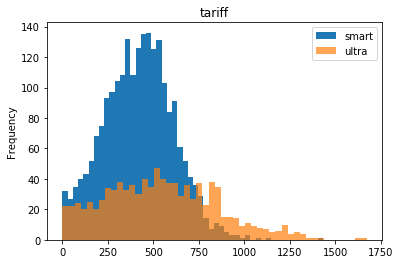

In [33]:
common_data.loc[common_data.loc[:,'tariff'] == 'smart']['duration_sum_month'].plot(
    kind = 'hist', bins = 50, label = 'smart'
)
common_data.loc[common_data.loc[:,'tariff'] == "ultra"]['duration_sum_month'].plot(
    kind = 'hist', bins = 50, alpha =0.7, label = 'ultra'
)
plt.title(column)
plt.legend()
plt.show()

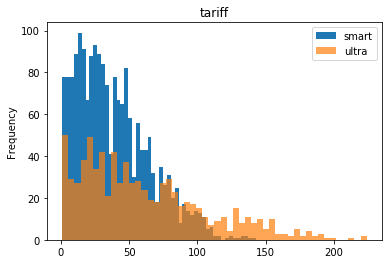

In [34]:
common_data.loc[common_data.loc[:,'tariff'] == 'smart']['messages_count_month'].plot(
    kind = 'hist', bins = 50, label = 'smart'
)
common_data.loc[common_data.loc[:,'tariff'] == "ultra"]['messages_count_month'].plot(
    kind = 'hist', bins = 50, alpha =0.7, label = 'ultra'
)
plt.title(column)
plt.legend()
plt.show()

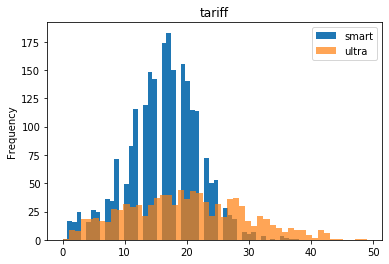

In [35]:
common_data.loc[common_data.loc[:,'tariff'] == 'smart']['internet_sum_month'].plot(
    kind = 'hist', bins = 50, label = 'smart'
)
common_data.loc[common_data.loc[:,'tariff'] == "ultra"]['internet_sum_month'].plot(
    kind = 'hist', bins = 50, alpha =0.7, label = 'ultra'
)
plt.title(column)
plt.legend()
plt.show()

При рассмотрении гистограмм, получим что:
<br> 1) в случае с потраченными минутами за месяц: распределения обоих тарифов близки к нормальному, но у пользователей тарифа Ульра распределение скошено в положительную сторону, то есть пользователи тратят ощутимо больше медианной величины
<br> 2) в случае с использованными сообщениями за месяц: распределения обоих тарифов близки к нормальному, оба распределения скошены в положительную сторону
<br> 3) в случае с использованным интернет-трафиком за месяц: распределения обоих тарифов близки к нормальному, оба распределения симметричны
<br> Пользователи тарифа Смарт чаще всего тратят весь пакет предоставленных им услуг, пользователи тарифа Ультра тратят меньше предоставленного пакета в случае с минутами разговора и смс. В случае с интернет-стафиком в среднем абоненты тарифа Ультра выговаривают весь пакет и достаточно часто докупают дополнительный трафик

Построим гистограмму по суммарной аплате за месяц

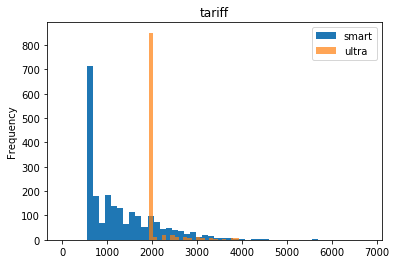

In [36]:
common_data.loc[common_data.loc[:,'tariff'] == 'smart']['total_pay'].plot(
    kind = 'hist', bins = 50, label = 'smart'
)
common_data.loc[common_data.loc[:,'tariff'] == "ultra"]['total_pay'].plot(
    kind = 'hist', bins = 50, alpha =0.7, label = 'ultra'
)
plt.title(column)
plt.legend()
plt.show()

In [37]:
common_data.loc[common_data.loc[:,'tariff'] == "ultra"]['total_pay'].describe()

count     986.000000
mean     2068.052738
std       381.732175
min         0.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: total_pay, dtype: float64

In [38]:
common_data.loc[common_data.loc[:,'tariff'] == "smart"]['total_pay'].describe()

count    2230.000000
mean     1289.395067
std       818.676629
min         0.000000
25%       550.000000
50%      1021.000000
75%      1750.000000
max      6770.000000
Name: total_pay, dtype: float64

Можно сделать вывод, что примерно 25% абонентов тарифа Смарт платят только абоненскую плату, для тафира Ультра доля таких абонентов составляет 75%
<br> Для абонентов тарифа Ультра пик более выражен, а абоненты тарифа Смарт в половине случаев все-таки выходят за рамки тарифного плана

### Выводы по главе 4
Пользователи тарифа Смарт чаще всего тратят весь пакет предоставленных им услуг, пользователи тарифа Ультра тратят меньше предоставленного пакета в случае с минутами разговора и смс. В случае с интернет-стафиком в среднем абоненты тарифа Ультра выговаривают весь пакет и достаточно часто докупают дополнительный трафик
<br>Примерно 25% абонентов тарифа Смарт платят только абоненскую плату, для тафира Ультра доля таких абонентов составляет 75%

## Проверка поставленных гипотез

### Первая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
<br> Н0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна между собой
<br> H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
<br> Пороговое значение alpha примем равным 0,05

In [39]:
alpha = .05

results = stat.ttest_ind(
    common_data.loc[common_data.loc[:,'tariff'] == 'ultra']['total_pay'],
    common_data.loc[common_data.loc[:,'tariff'] == 'smart']['total_pay']
)
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0060103384113545e-159
Отвергаем нулевую гипотезу


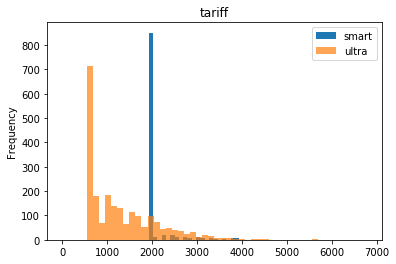

In [40]:
common_data.loc[common_data.loc[:,'tariff'] == 'ultra']['total_pay'].plot(
    kind = 'hist', bins = 50, label = 'smart'
)
common_data.loc[common_data.loc[:,'tariff'] == 'smart']['total_pay'].plot(
    kind = 'hist', bins = 50, alpha =0.7, label = 'ultra'
)
plt.title(column)
plt.legend()
plt.show()

Нулевая гипотеза отвергается, следовательно, в 95% случаев средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

### Вторая гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
<br> Н0: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов
<br> Н1: средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов
<br> Пороговое значение alpha примем равным 0,05

In [41]:
alpha = .05
#Так как выборки у нас разного размера 
#и есть сомнения, что дисперсии у совокупностей одинаковые (Москва сильно отличается от регионов)
# то применим значение equal_var = False

results = stat.ttest_ind(
    common_data.loc[common_data.loc[:,'city'] == 'Москва']['total_pay'],
    common_data.loc[common_data.loc[:,'city'] != 'Москва']['total_pay'],
    equal_var = False
)
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5037849720906431
Не получилось отвергнуть нулевую гипотезу


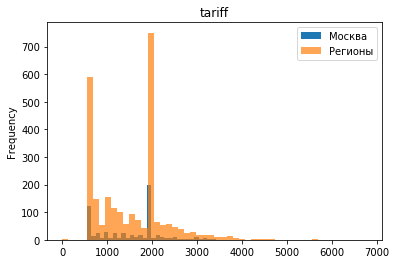

In [42]:
common_data.loc[common_data.loc[:,'city'] == 'Москва']['total_pay'].plot(
    kind = 'hist', bins = 50, label = 'Москва'
)
common_data.loc[common_data.loc[:,'city'] != 'Москва']['total_pay'].plot(
    kind = 'hist', bins = 50, alpha =0.7, label = 'Регионы'
)
plt.title(column)
plt.legend()
plt.show()

Нет оснований отвергнуть нулевую гипотезу, следовательно, в 95% случаев средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов

### Выводы по главе 5
В 95% случаев средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, при этом средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов

## Общий вывод
<br>Принимая во внимание то, что среднее и медианное значение выручки, принесенной абонентами тарифа **Ультра**, больше, чем значение выручки, принесенной абонентами тарифа **Смарт**, следует перераспределить основной объем рекламного бюджета на развитие тарифа **Ультра**, несмотря на то, что абоненты тарифа **Ультра** в большинстве случаев не выходят за рамки тарифного пакета
<br> Проведенное исследование позволило подтвердить гипотезу о том, что средняя выручка пользователей тарифов **Ультра** и **Смарт** различается.
<br> Проведенное исследование позволило опровергнуть гипотезу о том, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов
<br> *Итак*, лучше тариф Ультра, коммерческому департаменту следует развивать данный тариф
<br> Цель исследования выполнена, задачи решены